<a href="https://colab.research.google.com/github/120Davies/MMG/blob/master/MMG_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# OBJECTIVES
# 1) Establish clean sets of data:
#   a) Total raw data, with correct data types
#   b) Various data sets showing important correlations
# 2) Produce clean, concise graphs which illustrate interesting correlations on these data
# 3) Assemble graphs in a blog post in a consumable format.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy

In [0]:
reddit_url = 'https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(reddit)%20(Responses)%20-%20Form%20Responses%201.csv'
facebook_url = 'https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(Responses)%20-%20Form%20Responses%201.csv'
slack_url = 'https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(Slack)%20(Responses)%20-%20Form%20Responses%201.csv'

In [5]:
df_reddit_raw = pd.read_csv(reddit_url)
df_reddit_raw.head()

,Timestamp,How much money do you ask for (in USD)?,How many years old are you?,What is your gender?,About how much do you make per year?,"On a scale of 1 to 10, how greedy would you say you are?",Do you own a home?,Name a color.,Source
0,6/18/2019 19:51:45,1000,25.0,Male,6000,3.0,No,Black,reddit
1,6/18/2019 20:02:40,50,13.0,Male,0,4.0,No,Green,reddit
2,6/18/2019 20:12:08,50000000,19.0,Female,NaN,5.0,No,blue,reddit
3,6/18/2019 20:15:09,5000,15.0,Female,0,7.0,No,Gray,reddit
4,6/18/2019 20:20:41,250,24.0,Female,36000,6.0,No,purple,reddit


In [0]:
df_facebook_raw = pd.read_csv(facebook_url)
df_slack_raw = pd.read_csv(slack_url)

In [7]:
df_total_raw = pd.read_csv('https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(combined)%20(Responses)%20-%20Form%20Responses%201%20(1).csv')
df_total_raw.dtypes

Timestamp                                                    object
How much money do you ask for (in USD)?                     float64
How many years old are you?                                 float64
What is your gender?                                         object
About how much do you make per year?                         object
On a scale of 1 to 10, how greedy would you say you are?    float64
Do you own a home?                                           object
Name a color.                                                object
Source                                                       object
dtype: object

In [8]:
df_total_raw.columns = ['time', 'money', 'age', 'gender', 'income', 'greed', 'homeowner', 'color', 'source']
df_total_raw = df_total_raw.replace(to_replace = '0110111001101111', value = 0)
df_total_raw = df_total_raw.replace(to_replace = '-12000', value = 0)
df_total_raw = df_total_raw.replace(to_replace = '-10000', value = 0)
df_total_raw = df_total_raw.replace(to_replace = '00', value = 0)
df_total_raw = df_total_raw.replace(to_replace = ',', value = 15000)  # This guy...
# Entry 169 deleted for non-serious answers
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.2f' % x)
print(df_total_raw.shape)
df_total_raw.tail(430)

(1105, 9)


,time,money,age,gender,income,greed,homeowner,color,source
675,6/19/2019 6:46:29,10000.00,20.00,Male,0,4.00,No,Purple,reddit
676,6/19/2019 6:46:58,200.00,20.00,Female,8000,3.00,No,yellow,reddit
677,6/19/2019 6:49:58,999999.00,28.00,Male,40000,8.00,No,Fuchsia,reddit
678,6/19/2019 6:50:04,10000.00,34.00,Female,NaN,6.00,Yes,Pink,reddit
679,6/19/2019 6:51:03,200000.00,36.00,Female,35000,4.00,No,Cerulean,reddit
680,6/19/2019 6:51:34,49990.00,35.00,Male,7500,3.00,No,Green,reddit
681,6/19/2019 6:54:31,100000000000.00,31.00,Male,85000,1.00,Yes,Blue,reddit
682,6/19/2019 6:55:06,999999.00,25.00,Female,32000,4.00,No,Blue,reddit
683,6/19/2019 6:55:12,100.00,17.00,Male,0,8.00,No,Cerulean blue,reddit
684,6/19/2019 6:56:06,1000000.00,16.00,Male,7000,8.00,No,Green,reddit


In [9]:
df_total_raw['income'] = df_total_raw['income'].astype('float64')
df_total_raw.dtypes

time          object
money        float64
age          float64
gender        object
income       float64
greed        float64
homeowner     object
color         object
source        object
dtype: object

In [0]:
# I don't really care about 'time' feature right now.
# Money, age, income, and greed are all floats, as they should be.
# gender and homeowner could be represented by a boolean.
# I'll modify those in more specific datasets.

In [11]:
df_income = df_total_raw[['money', 'income']]
df_income = df_income.dropna()
df_income.shape

(964, 2)

In [12]:
df_income.describe()

,money,income
count,964.00,964.00
mean,3378600584.68,1037344408713719936.00
std,17922751790.62,32207831319706718208.00
min,0.01,0.00
25%,2000.00,71.25
50%,50000.00,20000.00
75%,900000.00,50000.00
max,100000000000.00,1000000000000000000000.00


In [13]:
# Pretty sure no respondents are making one sextillion dollars.
# Will drop silly responses from this table.
df_income = df_income.sort_values(by=['income'], axis='rows')
print(df_income.shape)
df_income.tail(20)

(964, 2)


,money,income
280,999.00,160000.00
926,200000.00,170000.00
432,999.00,175000.00
246,150000.00,180000.00
493,100000000000.00,190000.00
407,20000.00,190000.00
704,999999.00,200000.00
363,999999.98,200000.00
111,1000000.00,200000.00
22,5000000000.00,200000.00


In [0]:
df_income = df_income.drop(labels=[653, 169], axis='rows')
print(df_income.shape)
df_income.describe()

In [0]:
df_income_indexed = df_income.reset_index()
df_income_indexed = df_income_indexed.reset_index()
plt.plot(df_income_indexed['level_0'], df_income_indexed['income'])


In [0]:
pd.options.display.max_rows =1000
df_income_indexed.tail(500)

In [0]:
# I'm skeptical I've got respondents that actually make 550k per year, but at least it's plausible.
# I want to represent the correlation between 'money' and 'income'
# Best to look at that by binning income based on percentile
# and observing the median 'money' in each bin.
# Binning method is to create 4 new dataframes, one for each approximate quartile.
# Approximate, because the incomes at each quartile division are not unique.
# e.g., median income is $20,000, with many entries at that value. Quartile divisions
# need to be split between distinct values.
df_income_q1 = df_income_indexed.loc['0':'225']
df_income_q2 = df_income_indexed.loc['226':'489']
df_income_q3 = df_income_indexed.loc['490':'731']
df_income_q4 = df_income_indexed.loc['732':'961']

In [18]:
print(df_income_q1.money.median())
print(df_income_q2.money.median())
print(df_income_q3.money.median())
print(df_income_q4.money.median())
df_income_q1.head()

20000.0
20000.0
49999.5
224999.5


,level_0,index,money,income
0,0,573,9999.00,0.00
1,1,473,99999.00,0.00
2,2,209,2222222.00,0.00
3,3,471,1000.00,0.00
4,4,737,650.00,0.00


In [0]:
#df's for homeownership
df_homeowners = df_total_raw[df_total_raw['homeowner'] == 'Yes']
df_renters = df_total_raw[df_total_raw['homeowner'] == 'No']

In [0]:
# clean the color column, make color df's
df_total_raw.color = df_total_raw.color.str.lower()
pd.value_counts(df_total_raw['color'].values, sort=True)

In [21]:
# That is ugly.
# We'll start by using just the high counts. If I have time, I'll go through and
# clean the many low-instance colors.
# TODO: sort misc. colors

# blue, green, purple, red, orange, yellow, black, have enough entries for analysis

df_colors = df_total_raw[['money', 'color']]
print(df_colors.shape)
df_colors.head()


(1105, 2)


,money,color
0,17000.00,blue
1,300000.00,green
2,100000.00,blue
3,1000000.00,green
4,500000.00,red


In [22]:
df_blue = df_total_raw[df_total_raw['color']=='blue']
df_green = df_total_raw[df_total_raw['color']=='green']
df_purple = df_total_raw[df_total_raw['color']=='purple']
df_red = df_total_raw[df_total_raw['color']=='red']
df_orange = df_total_raw[df_total_raw['color']=='orange']
df_yellow = df_total_raw[df_total_raw['color']=='yellow']
df_black = df_total_raw[df_total_raw['color']=='black']
df_other = df_total_raw[~df_total_raw['color'].isin(['blue', 'green', 'purple', 'red', 'orange', 'yellow', 'black'])]
df_other.head()

,time,money,age,gender,income,greed,homeowner,color,source
6,6/18/2019 19:09:00,10000000.00,38.00,Male,24000.00,3.00,No,brown,Slack
7,6/18/2019 19:09:32,999.00,24.00,Male,0.00,3.00,No,burgundy,Slack
9,6/18/2019 19:17:39,696.00,23.00,Male,25000.00,8.00,No,rebeccapurple,Slack
10,6/18/2019 19:22:17,1000000.00,48.00,Male,0.00,2.00,Yes,brown,Slack
11,6/18/2019 19:22:42,10000000.00,22.00,Male,40000.00,4.00,No,white,Slack


In [80]:
df_age = df_total_raw[['money', 'age']]
df_age = df_age.dropna()
df_age = df_age.sort_values(by=['age'], axis='rows')
df_age = df_age.drop(labels = 1007, axis='rows')
df_age = df_age.drop(labels = 744, axis='rows')
df_age.describe()
# ax = sns.distplot(df_age.age, bins = int())
# plt.xlim(0,)

,money,age
count,"1,044.00","1,044.00"
mean,"3,313,375,319.43",24.68
std,"17,757,399,267.91",7.67
min,0.01,13.00
25%,"1,500.00",19.00
50%,"41,034.00",23.00
75%,"872,650.25",28.00
max,"100,000,000,000.00",68.00


In [77]:
df_age['age'].nunique()

46

(0, 68)

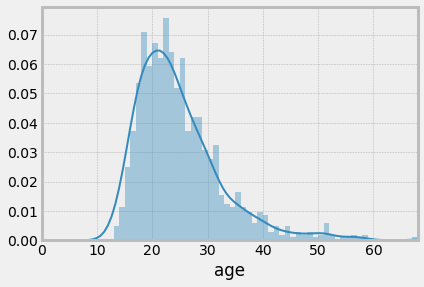

In [79]:
ax = sns.distplot(df_age.age, bins = int(55))
plt.xlim(0,68)

In [92]:
df_age_i = df_age.reset_index()
df_age_i.tail(1000)

,index,money,age
44,687,"20,000.00",16.00
45,390,"5,000.00",16.00
46,413,"1,000.00",16.00
47,348,"10,000.00",16.00
48,75,"500,000.00",16.00
49,549,73.00,16.00
50,684,"1,000,000.00",16.00
51,629,"20,000.00",16.00
52,298,700.00,16.00
53,339,"1,500.00",16.00


In [110]:
df_older = df_age_i.loc['833':'999']
df_teens = df_age_i.loc['0':'273']
df_low_20s = df_age_i.loc['274':'608']
df_high_20s = df_age_i.loc['609':'832']


,index,money,age


Text(0.5, 1.0, 'Self-reported Greed')

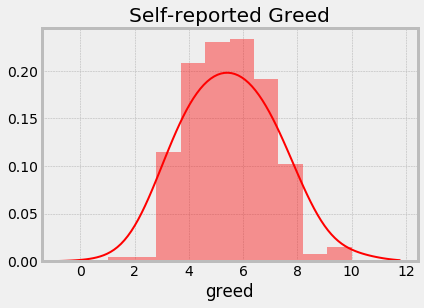

In [42]:
# greed
df_greed = df_total_raw[['money', 'greed']]
df_greed = df_greed.dropna()
ax = sns.distplot(df_greed.greed, bins = int(10), color = 'r', kde_kws={'bw':.6})
plt.title('Self-reported Greed')
# plt.hist(df_greed['greed'], color='red', edgecolor='black', bins=int(10))

In [24]:
# I want to split greed into a high, moderate, and low df.
df_greed_low = df_greed[df_greed['greed'].isin([0,1,2,3,4])]
print(df_greed_low.shape)
df_greed_med = df_greed[df_greed['greed'].isin([5,6])]
print(df_greed_med.shape)
df_greed_hi = df_greed[df_greed['greed'].isin([7,8,9,10])]
df_greed_hi.shape

(323, 2)
(451, 2)


(307, 2)

In [25]:
df_male = df_total_raw[df_total_raw['gender'].isin(['Male'])]
df_female = df_total_raw[df_total_raw['gender'].isin(['Female'])]
print(df_male.shape)
df_female.shape

(676, 9)


(385, 9)

In [111]:
# Make another DF to use in a histogram

medians = {'Categories': ['All', 'No income', 
                          'Income: $1 to 20k',
                          'Income: $21k to 50k', 
                          'Income: $50k or more',
                          'Homeowners',
                          'Non-homeowners',
                          'Blue',
                          'Green',
                          'Purple',
                          'Red',
                          'Orange',
                          'Yellow',
                          'Black',
                          'Other colors',
                          'Low greed',
                          'Moderate greed',
                          'High greed',
                          'Males',
                          'Females',
                          'Teens',
                          '20-24 year-olds',
                          '25-29 year-olds',
                          '30+ year-olds'],
          'Median': [df_total_raw.money.median(),
                     df_income_q1.money.median(),
                     df_income_q2.money.median(),
                     df_income_q3.money.median(),
                     df_income_q4.money.median(),
                     df_homeowners.money.median(),
                     df_renters.money.median(),
                     df_blue.money.median(),
                     df_green.money.median(),
                     df_purple.money.median(),
                     df_red.money.median(),
                     df_orange.money.median(),
                     df_yellow.money.median(),
                     df_black.money.median(),
                     df_other.money.median(),
                     df_greed_low.money.median(),
                     df_greed_med.money.median(),
                     df_greed_hi.money.median(),
                     df_male.money.median(),
                     df_female.money.median(),
                     df_teens.money.median(),
                     df_low_20s.money.median(),
                     df_high_20s.money.median(),
                     df_older.money.median()]}
df_medians = pd.DataFrame(medians)
# df_medians = df_medians.set_index(['Categories'])
df_medians.head(25)

,Categories,Median
0,All,"40,000.00"
1,No income,"20,000.00"
2,Income: $1 to 20k,"20,000.00"
3,Income: $21k to 50k,"49,999.50"
4,Income: $50k or more,"224,999.50"
5,Homeowners,"134,499.50"
6,Non-homeowners,"25,000.00"
7,Blue,"32,000.00"
8,Green,"50,000.00"
9,Purple,"25,000.00"


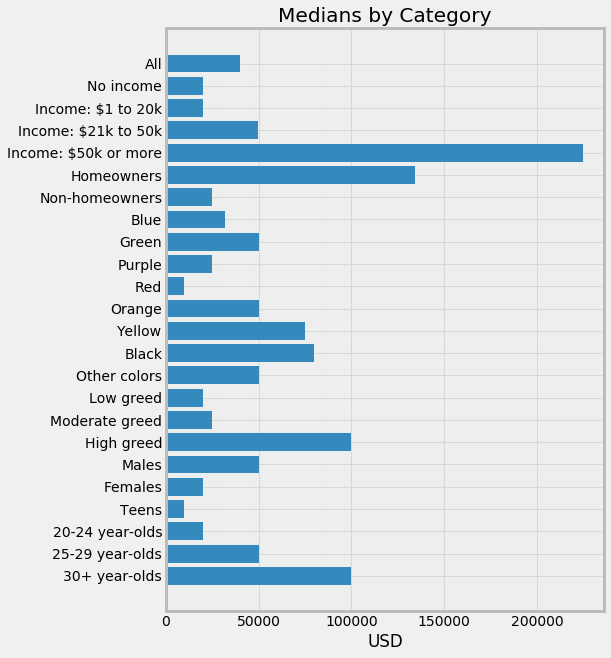

In [112]:
# df_medians.plot.bar()
# plt.style.use('fivethirtyeight')
# plt.title('Median Amounts Picked by Category')
# plt.ylabel('USD')
# plt.show()
fig, ax = plt.subplots()
ax.barh(df_medians.Categories, df_medians.Median, align = 'center')
ax.set_yticklabels(df_medians.Categories)
ax.set_xlabel('USD')
ax.set_yticks(df_medians.Categories)
fig.set_size_inches(7,10)
ax.invert_yaxis()
ax.set_title('Medians by Category')
plt.style.use('bmh')
plt.show()

In [0]:
np.set_printoptions(suppress=True)

In [31]:
# 181 rows had NaNs, and are removed in df_pure

df_total_indexed = df_total_raw.sort_values(by=['money'], axis='rows')
df_total_indexed = df_total_indexed.reset_index()
df_total_indexed = df_total_indexed.reset_index()
df_total_indexed.head()


,level_0,index,time,money,age,gender,income,greed,homeowner,color,source
0,0,786,6/19/2019 9:00:09,0.01,20.00,Male,"15,000.00",5.00,No,green,reddit
1,1,651,6/19/2019 6:18:28,0.01,26.00,Female,0.00,5.00,No,blue,reddit
2,2,1085,6/21/2019 3:05:34,0.20,17.00,Male,nan,6.00,No,blue,reddit
3,3,855,6/19/2019 10:26:47,0.25,32.00,Male,"20,000.00",4.00,Yes,blue,reddit
4,4,71,6/18/2019 21:14:54,1.00,29.00,Female,"25,000.00",8.00,No,blue,reddit


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([213., 764.,  64.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.        ,  18.8490566 ,  37.69811321,  56.54716981,
         75.39622642,  94.24528302, 113.09433962, 131.94339623,
        150.79245283, 169.64150943, 188.49056604, 207.33962264,
        226.18867925, 245.03773585, 263.88679245, 282.73584906,
        301.58490566, 320.43396226, 339.28301887, 358.13207547,
        376.98113208, 395.83018868, 414.67924528, 433.52830189,
        452.37735849, 471.22641509, 490.0754717 , 508.9245283 ,
        527.77358491, 546.62264151, 565.47169811, 584.32075472,
        603.16981132, 622.01886792, 640.86792453, 659.71698113,
        678.56603774, 697.41509434, 716.26415094, 735.11320755,


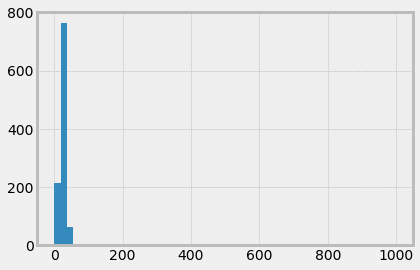

In [54]:
plt.hist(df_total_raw['age'], bins=53)


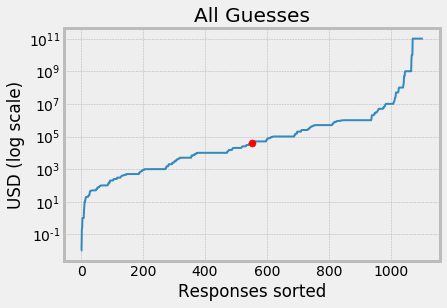

In [113]:
fig, ax = plt.subplots()
plt.plot(df_total_indexed['level_0'], df_total_indexed['money'], zorder=1)
plt.style.use('bmh')
plt.scatter(df_total_indexed.level_0.median(), df_total_indexed.money.median(), color = 'red', s=50, zorder=3)
plt.title('All Guesses')
plt.ylabel('USD (log scale)')
plt.xlabel('Responses sorted')
plt.yscale('log')
plt.show()

In [0]:
df_players = df_total_raw.loc[(df_total_raw.money>9.99)&(df_total_raw.money<10000000)]
df_players = df_players.dropna()
df_players = df_players.sort_values(by=['money'], axis='rows')
df_players = df_players.reset_index()
df_players = df_players.reset_index()
df_players.income = df_players.income.astype('float64')
print(df_players.shape)
print(df_players.median())
df_players.head(500)

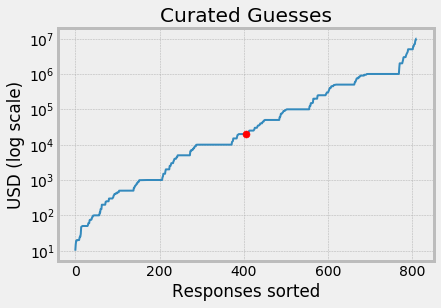

In [51]:
fig, ax = plt.subplots()
plt.plot(df_players['level_0'], df_players ['money'], zorder=2)
plt.title('Curated Guesses')
# ax.vlines(405,10,20000, colors='r',label='Median: $20,000')
plt.scatter(df_players.level_0.median(), df_players.money.median(), color = 'red', s=50, zorder=3)
plt.ylabel('USD (log scale)')
plt.yscale('log')
plt.xlabel('Responses sorted')
ax.hlines(0,811,0, colors='black')
plt.show()